In [79]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [81]:
df=pd.read_csv(r"C:\Users\scet2\OneDrive\Dokumente\climateQ6.csv")

In [83]:
df


,observation,Humidity,Temperature,Rain
0,1,58,19,0
1,2,62,26,0
2,3,40,30,0
3,4,36,35,0
4,5,87,19,1
5,6,83,18,1
6,7,79,16,1
7,8,69,17,1
8,9,62,33,0
9,10,71,15,1


In [95]:
x=df[['Humidity','Temperature']]
y=df['Rain']

In [97]:
k=5
knn=KNeighborsClassifier(n_neighbors=k)

In [99]:
test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)


In [101]:
x_test

,Humidity,Temperature
10,55,33
9,71,15
0,58,19


In [103]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [105]:
y_pred

array([0, 1, 0], dtype=int64)

In [107]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [120]:
newdata=pd.DataFrame({'Humidity':[84],'Temperature':[34]})
            

In [122]:
newdata

,Humidity,Temperature
0,84,34


In [124]:
prediction=knn.predict(newdata)

In [126]:
prediction

array([1], dtype=int64)

In [130]:
newdata['rain']=prediction

In [132]:
print(newdata)

   Humidity  Temperature  rain
0        84           34     1


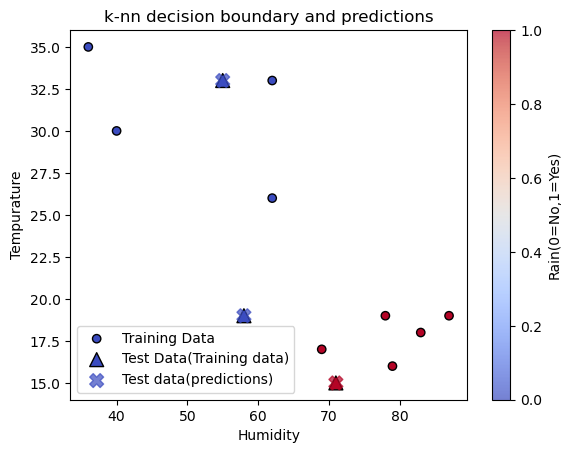

In [138]:
import matplotlib.pyplot as plt
plt.scatter(x_train['Humidity'],x_train['Temperature'],c=y_train,cmap='coolwarm',edgecolor='k',label='Training Data')
plt.scatter(x_test['Humidity'],x_test['Temperature'],c=y_test,cmap='coolwarm',marker='^',s=100,edgecolor='k',label='Test Data(Training data)')
plt.scatter(x_test['Humidity'],x_test['Temperature'],c=y_test,cmap='coolwarm',marker='X',s=100,label='Test data(predictions)',alpha=0.7)  
plt.colorbar(label='Rain(0=No,1=Yes)')
plt.xlabel('Humidity')
plt.ylabel('Tempurature')
plt.title('k-nn decision boundary and predictions')
plt.legend()
plt.show()            
            